# BBC News Article Classification 2

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size=1000 # YOUR CODE HERE
embedding_dim=16 # YOUR CODE HERE
max_length=120 # for padding YOUR CODE HERE
trunc_type='post' # YOUR CODE HERE
padding_type='post' # YOUR CODE HERE
oov_tok="<OOV>" # YOUR CODE HERE
training_portion=.8 # 80% train set, 20% test set

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [4]:
import os

with open(f'{os.getcwd()}\\BBC_Data\\bbc-text.csv', 'r') as csvfile:
    datastore = csv.reader(csvfile, delimiter=',')
    
    next(datastore)
    
    # loop through csv file and get labels and sentences
    for row in datastore:
        labels.append(row[0])
        sentence = row[1]
        
        # check in each row for stopword tokens and replace with space
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)
        # YOUR CODE HERE

    
print("Number of labels: ",len(labels))
print("Number of Sentences: ",len(sentences))
print("First sentence:\n",sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

Number of labels:  2225
Number of Sentences:  2225
First sentence:
 tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules 

In [5]:
# Step 1 Split dataset in train and test
train_size = int(len(sentences) * training_portion) # YOUR CODE HERE
print("Training Size setting: ",train_size)


train_sentences = sentences[:train_size] # YOUR CODE HERE
print("Training sentences size after slicing: ",len(train_sentences))

train_labels = labels[:train_size] # YOUR CODE HERE
print("Training labels size after slicing: ",len(train_labels))



validation_sentences = sentences[train_size:]# YOUR CODE HERE
print("Validation sentences size after slicing: ",len(validation_sentences))

validation_labels = labels[train_size:]# YOUR CODE HERE
print("Validation labels size after slicing: ",len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

Training Size setting:  1780
Training sentences size after slicing:  1780
Training labels size after slicing:  1780
Validation sentences size after slicing:  445
Validation labels size after slicing:  445


In [6]:
# Step 2 instantiate tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) # YOUR CODE HERE

# Step 3 fit/train tokenizer on text
tokenizer.fit_on_texts(train_sentences) # YOUR CODE HERE

# Step 4 create word index/dictionary
word_index = tokenizer.word_index # YOUR CODE HERE

# Step 5 translate sentences into (different length) token sequences (train)
train_sequences = tokenizer.texts_to_sequences(train_sentences) # YOUR CODE HERE

# Step 6 pad the token sequences to equalize length (train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length) # YOUR CODE HERE

# print some sequence lengths for verification
print("Train Sequence 0 raw: ",len(train_sequences[0]))
print("Train Sequence 0 padded: ",len(train_padded[0]))

print("Train Sequence 1 raw: ",len(train_sequences[1]))
print("Train Sequence 1 padded: ",len(train_padded[1]))

print("Train Sequence 10 raw: ",len(train_sequences[10]))
print("Train Sequence 10 padded: ",len(train_padded[10]))

print("train_padded shape: ",train_padded.shape)

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

Train Sequence 0 raw:  449
Train Sequence 0 padded:  120
Train Sequence 1 raw:  200
Train Sequence 1 padded:  120
Train Sequence 10 raw:  192
Train Sequence 10 padded:  120
train_padded shape:  (1780, 120)


In [7]:
# Step 5 translate sentences into (different length) token sequences (validation)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) # YOUR CODE HERE

# Step 6 pad the token sequences to equalize length (validation)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length) # YOUR CODE HERE

# print some verification
print("Validation sequences samples: ",len(validation_sequences))
print("Validation padded shape: ",validation_padded.shape)

# Expected output
# 445
# (445, 120)

Validation sequences samples:  445
Validation padded shape:  (445, 120)


## Labels also get tokenized

In [8]:
label_tokenizer = Tokenizer() # YOUR CODE HERE

# label tokens are fit to all (train+val) labels, since they may not contain <oov>
label_tokenizer.fit_on_texts(labels) # YOUR CODE HERE

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels)) # YOUR CODE HERE
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels)) # YOUR CODE HERE

# print some labels for verification
print("Train label 0: ",training_label_seq[0])
print("Train label 1: ",training_label_seq[1])
print("Train label 2: ",training_label_seq[2])
print("Train label shape: ",training_label_seq.shape)

print("Val label 0: ",validation_label_seq[0])
print("Val label 1: ",validation_label_seq[1])
print("Val label 2: ",validation_label_seq[2])
print("Val label shape: ",validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

Train label 0:  [4]
Train label 1:  [2]
Train label 2:  [1]
Train label shape:  (1780, 1)
Val label 0:  [5]
Val label 1:  [4]
Val label 2:  [3]
Val label shape:  (445, 1)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2) # YOUR CODE HERE

Epoch 1/30
56/56 - 0s - loss: 1.7541 - accuracy: 0.2584 - val_loss: 1.7158 - val_accuracy: 0.2292
Epoch 2/30
56/56 - 0s - loss: 1.6637 - accuracy: 0.3039 - val_loss: 1.6218 - val_accuracy: 0.2539
Epoch 3/30
56/56 - 0s - loss: 1.5614 - accuracy: 0.3573 - val_loss: 1.5138 - val_accuracy: 0.4494
Epoch 4/30
56/56 - 0s - loss: 1.4320 - accuracy: 0.5213 - val_loss: 1.3688 - val_accuracy: 0.5820
Epoch 5/30
56/56 - 0s - loss: 1.2546 - accuracy: 0.6129 - val_loss: 1.1789 - val_accuracy: 0.6247
Epoch 6/30
56/56 - 0s - loss: 1.0485 - accuracy: 0.6989 - val_loss: 0.9915 - val_accuracy: 0.7236
Epoch 7/30
56/56 - 0s - loss: 0.8570 - accuracy: 0.8281 - val_loss: 0.8247 - val_accuracy: 0.8360
Epoch 8/30
56/56 - 0s - loss: 0.6979 - accuracy: 0.8972 - val_loss: 0.6958 - val_accuracy: 0.8876
Epoch 9/30
56/56 - 0s - loss: 0.5715 - accuracy: 0.9275 - val_loss: 0.5908 - val_accuracy: 0.8921
Epoch 10/30
56/56 - 0s - loss: 0.4648 - accuracy: 0.9371 - val_loss: 0.5144 - val_accuracy: 0.8989
Epoch 11/30
56/56 -

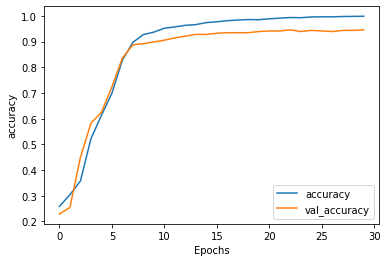

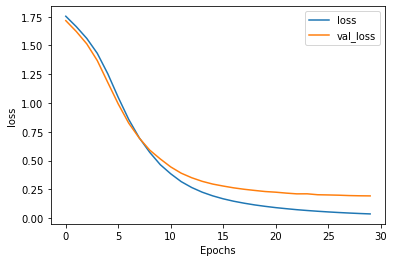

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [14]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [17]:
import io

out_v = io.open('vecs_BBC.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_BBC.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

https://projector.tensorflow.org/